In [1]:
#Installing required packages
!pip install tf_keras scikit-learn tensorflow deep_translator nltk
!pip install Keras-Preprocessing wordcloud

#Importing Libraries
import numpy as np
import pandas as pd
import nltk

#Imports For Exploratory Data Analaysis (EDA)
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

#Imports For Preprocessing
from nltk.corpus import stopwords
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from collections import Counter
from deep_translator import GoogleTranslator
from wordcloud import WordCloud

#Imports For Training/Testing
import tensorflow as tf
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from keras.layers import Activation, Dense, Dropout, Flatten, GRU, Conv1D, MaxPooling1D
import urllib
import requests
import re
sns.set()
%matplotlib inline

#Downloading word packages for language processing
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('brown')
nltk.download("reuters")
nltk.download('words')
nltk.download('punkt')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.7 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

##Exploratory Data Analysis on basic/physical attributes.





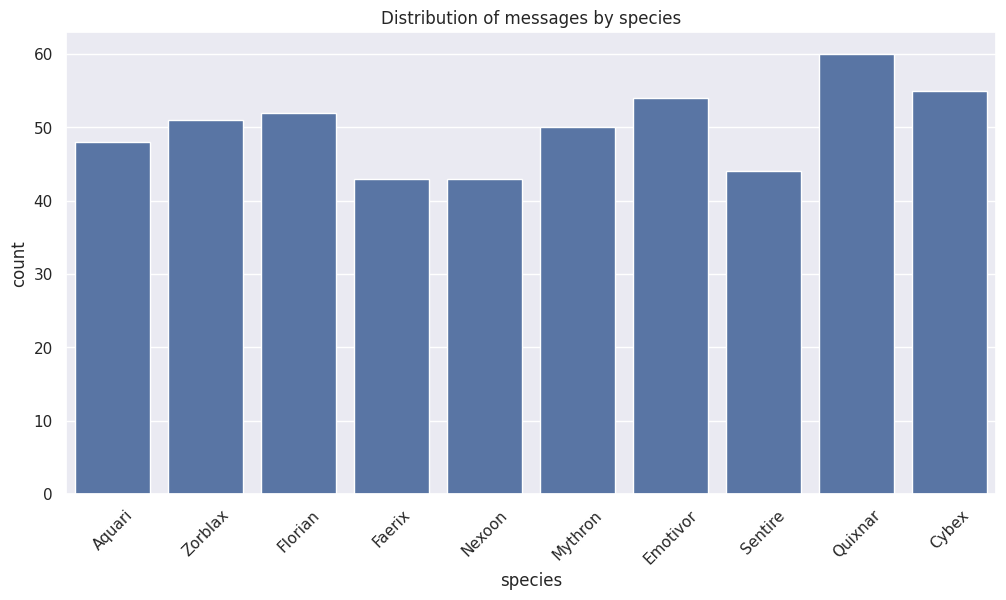

In [ ]:
data = pd.read_csv("data.csv")

# Species Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x = 'species', data=data)
plt.title('Distribution of messages by species')
plt.xticks(rotation = 45)
plt.show()

Pretty equal across the board.



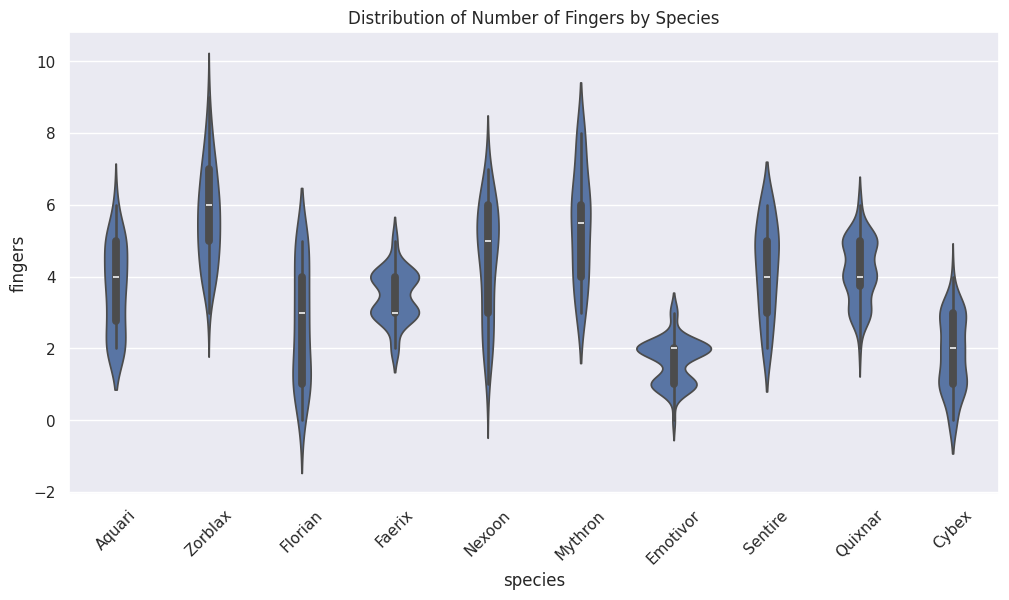

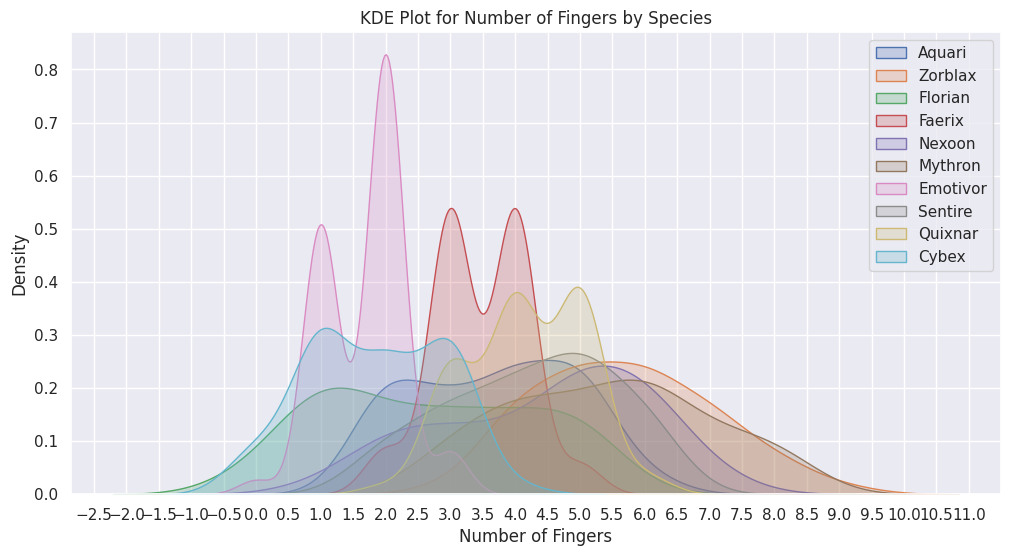

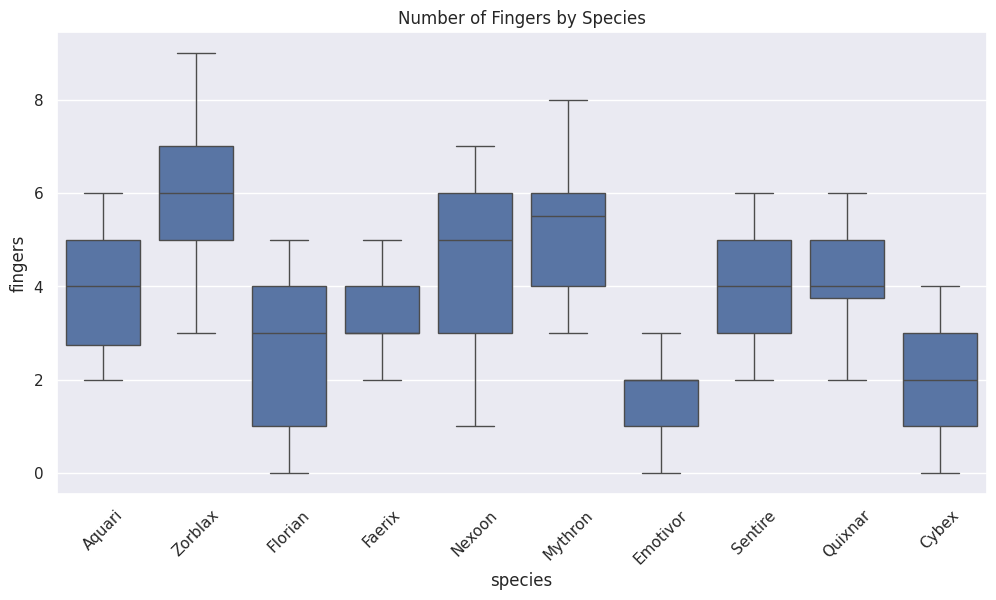

In [ ]:
# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='species', y='fingers', data=data)
plt.title('Distribution of Number of Fingers by Species')
plt.xticks(rotation=45)
plt.show()

# KDE plot
plt.figure(figsize=(12, 6))
for species in data['species'].unique():
    subset = data[data['species'] == species]
    sns.kdeplot(subset['fingers'], label=species, fill=True)

plt.title('KDE Plot for Number of Fingers by Species')
plt.xlabel('Number of Fingers')
plt.gca().xaxis.set_major_locator(MultipleLocator(0.5))
plt.legend()
plt.show()

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='fingers', data=data)
plt.title('Number of Fingers by Species')
plt.xticks(rotation=45)
plt.show()

Naive Inferences :

1. The violin/KDE reveal the non-normal nature of the Faerix and Emotivor species, with it having a bimodal curve.
2. Therefore, a Gaussian Naive Bayes classification model wouldn't work perfectly for those two species, for this attribute.
3. For the rest, they more or less follow a normal distribution, so a GNBC makes sense for them.

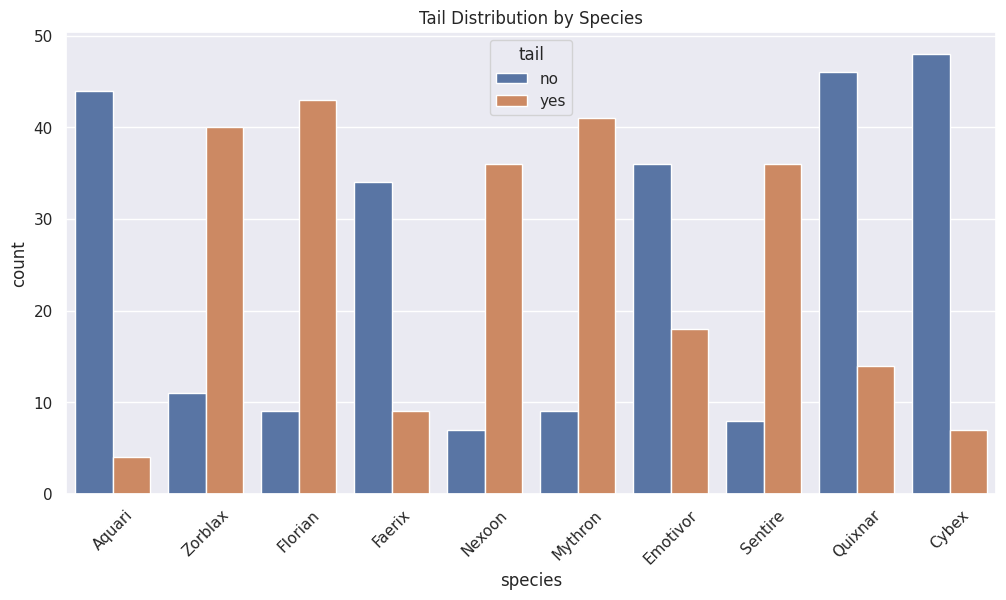

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='species', hue='tail', data=data)
plt.title('Tail Distribution by Species')
plt.xticks(rotation=45)
plt.show()

###Linguistic Data Analysis

In [ ]:
# Preprocessing function to clean and tokenize text
def preprocess_message(message):

    lemmatizer = WordNetLemmatizer()
    lemmatizations = lemmatizer.lemmatize(message)
    tokens = word_tokenize(lemmatizations.lower())  # Convert to lowercase and tokenize
    filtered_words = [word for word in tokens]
    return filtered_words

# Apply the preprocessing to each message
data['Processed Message'] = data['message'].apply(preprocess_message)


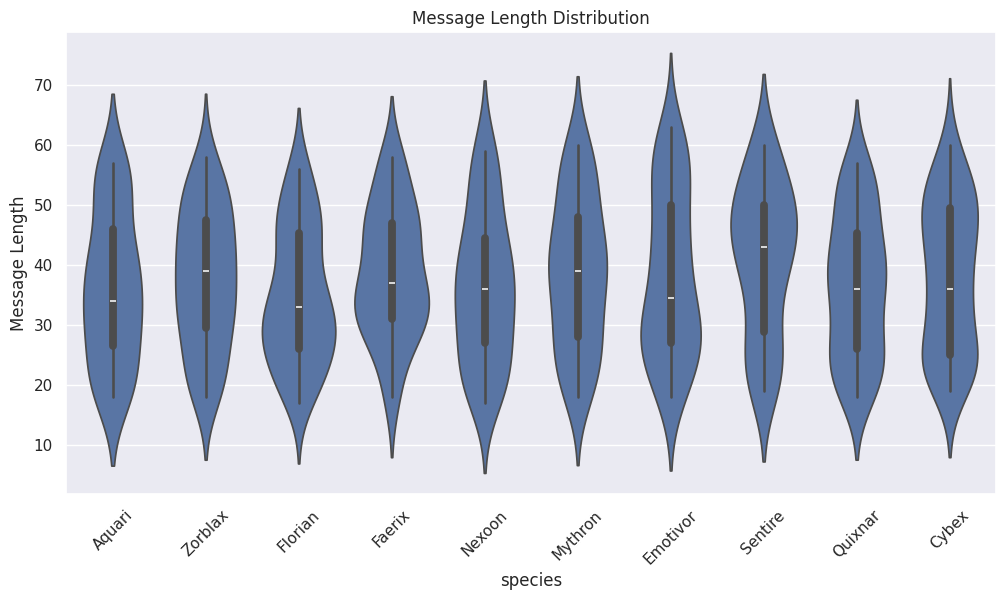

In [ ]:
# Message length distribution
data['Message Length'] = data['message'].apply(len)

plt.figure(figsize=(12, 6))
sns.violinplot(x='species', y='Message Length', data=data)
plt.title('Message Length Distribution')
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='fingers', ylabel='Message Length'>

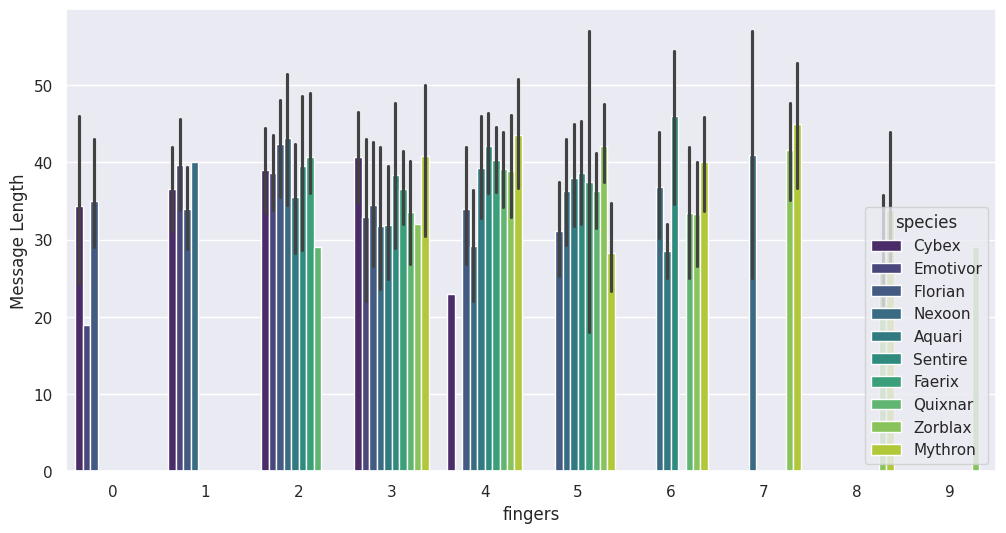

In [ ]:
# Checking whether the message length correlates with the number of fingers.
plt.figure(figsize=(12,6))
sns.barplot(data=data, x = 'fingers', y = 'Message Length', hue = 'species', palette='viridis')

Looks to be pretty equal across the board, with each following approximately the same normal distribution.



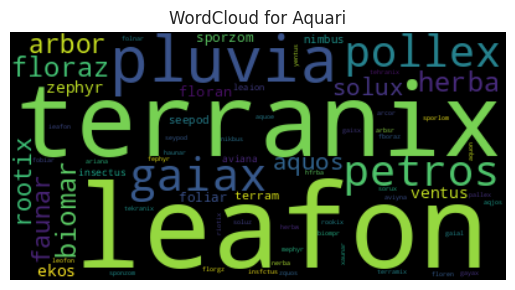

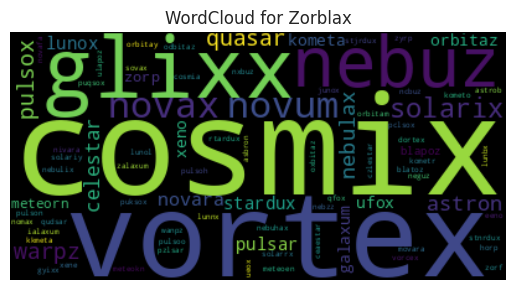

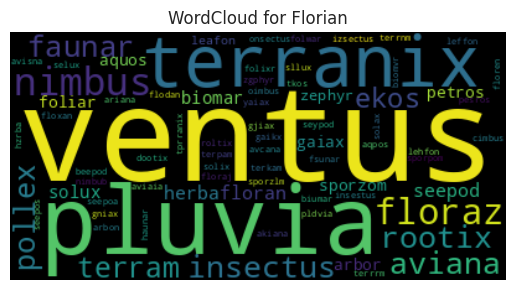

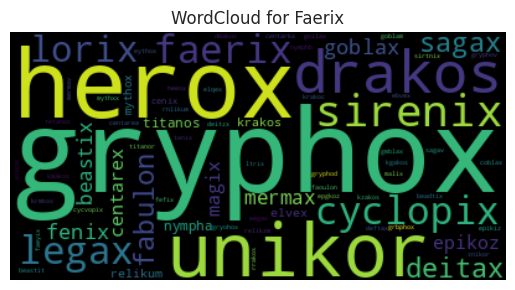

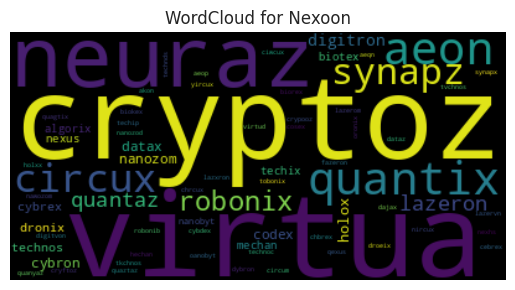

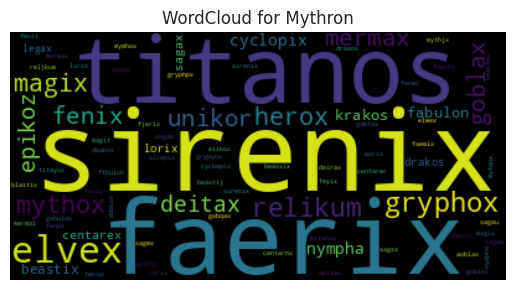

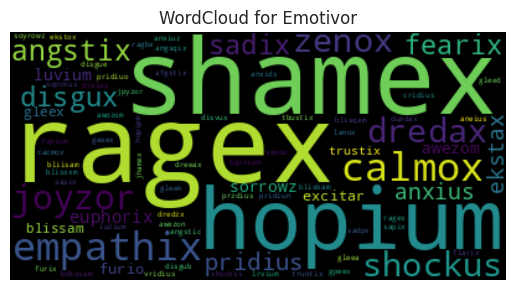

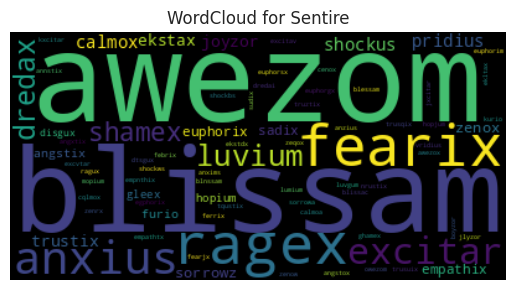

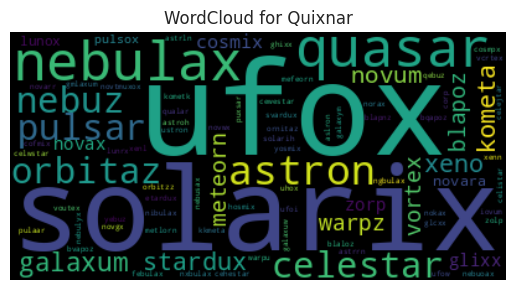

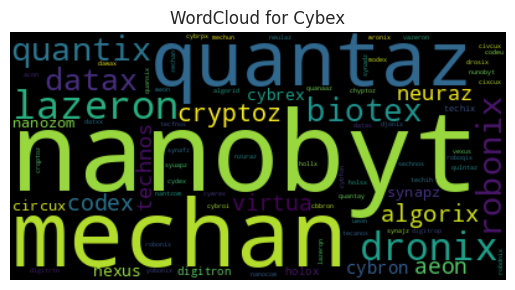

In [ ]:
def get_wordcloud(species):
    species_data = data[data['species'] == species]
    text = ' '.join(species_data['message'].tolist())
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {species}')
    plt.show()

species_list = data['species'].unique()
for species in species_list:
    get_wordcloud(species)


We can see a clear pattern here. "Cybex" has tech-oriented language, "Quixnar" has space oriented language, etc.

- Lemmatize these to their english counterparts, to the best possible ability. Discuss on how to do it.
- A naive approach : Remove the random alien sounds at the end like "ex", "ix", etc. Works for quite a few words.
- Quixnar and Zorblax are pretty similar. So are Faunar and Aquaris. Account for this, discuss.

In [ ]:
# Removes 'x' and 'z' from the ending.
def cleanEnding(message):

    cleaned_message = []
    message = message.split()

    for word in message:
        if word[-1] in ['x','z']:
            word = word[:-1]
        cleaned_message.append(word)
    return ' '.join(cleaned_message)

# Convert latin words to english.

def englishConversion(message):

    translator = GoogleTranslator(source="latin",target="english") # Initialize the translator.

    translatedMessage = []
    message = message.split(' ')

    for word in message:
        translatedWord = translator.translate(word)
        translatedMessage.append(translatedWord)

    return ' '.join(translatedMessage)

def processing(message):

    message = englishConversion(cleanEnding(message))

    lemmatizer = WordNetLemmatizer() # Lemmatizing, now that it is similar to english.
    tokens = word_tokenize(message) # Tokenization, so the model can understand better.

    lemmatizations = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatizations


1. Aniket pointed out that a lot of the words are in latin. `deep_translator` is a library for language translation. `GoogleTranslator` is an object that uses Google Translate's API for translation. We want to convert the latin words into english.

2. A lot of the words used are in english, except with an 'x' or a 'z' at the ending. Removing this suffix would make the word closer to english, while also removing a garbage character that doesn't add any context/meaning to the word.

In [ ]:
data['preprocessed_message'] = data['message'].apply(processing) # Processing the data

In [ ]:
# Cleaning the data further

def join(message):
    return ' '.join(word for word in message)

nltk.download('stopwords')
stopwords_list = stopwords.words('english')

additional_stopwords = ['i','a'] # Words I found in the data that are useless
stopwords_list.extend(additional_stopwords)

def remove_stopwords(message):

    res = []

    for word in message:
        if word not in stopwords_list:
            res.append(word.lower())

    return ' '.join(res)

data['processedMessage'] = data['preprocessed_message'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Now, we need to handle the multimodal distribution of the number of fingers of the "Faerix" and "Emotivor" species. Through observing the KDE graph, we can see that the slope is 0 for Faerix when x = 3.5, and for Emotivor when x = 1.5. So let's separate the datapoints.**

In [ ]:
def split_species(row):
    if row["species"] == "Faerix":
        if row["fingers"] <= 3.5:
            return "Faerix_Group1"
        else:
            return "Faerix_Group2"
    elif row["species"] == "Emotivor":
        if row["fingers"] <= 1.5:
            return "Emotivor_Group1"
        else:
            return "Emotivor_Group2"
    return row["species"]

data["species_group"] = data.apply(split_species, axis=1)

data['species_group'].unique()

array(['Aquari', 'Zorblax', 'Florian', 'Faerix_Group2', 'Nexoon',
       'Mythron', 'Emotivor_Group2', 'Sentire', 'Quixnar', 'Cybex',
       'Emotivor_Group1', 'Faerix_Group1'], dtype=object)

In [ ]:
data.to_csv("ProcessedData.csv") # Storing the data.

## Testing Different Models On The Processed File

In [27]:
df=pd.read_csv("processedData.csv")
df

,Unnamed: 0,message,fingers,tail,species,preprocessed_message,processedMessage,species_group
0,0,pluvia arbor aquos,4,no,Aquari,"['rain', 'a', 'tree', 'water']",rain tree water,Aquari
1,1,cosmix xeno nebuz odbitaz,5,yes,Zorblax,"['cosmos', 'xeno', 'in', 'the', 'sky', 'reject...",cosmos xeno sky rejected,Zorblax
2,2,solarix glixx novum galaxum quasar,5,yes,Zorblax,"['solar', 'glix', 'new', 'galaxy', 'quasar']",solar glix new galaxy quasar,Zorblax
3,3,arbor insectus pesros ekos dootix nimbus,2,yes,Florian,"['a', 'tree', 'insect', 'peso', 'eco', 'gifted...",tree insect peso eco gifted cloud,Florian
4,4,mermax drakos lorix epikoz deftax,4,no,Faerix,"['merma', 'dragon', 'to', 'wear', 'epic', 'deft']",merma dragon wear epic deft,Faerix_Group2
...,...,...,...,...,...,...,...,...
495,495,empathix sadix disgux dredax pridius afgstix e...,2,no,Emotivor,"['empathize', 'sad', 'discus', 'dreds', 'earli...",empathize sad discus dreds earlier afgst excited,Emotivor_Group2
496,496,quasar ustron nebulax meteorn,4,no,Quixnar,"['quasar', 'burn', 'fog', 'meteorn']",quasar burn fog meteorn,Quixnar
497,497,astron xeno ceaestar astron kometa,6,yes,Zorblax,"['astron', 'xeno', 'dinner', 'astron', 'comet']",astron xeno dinner astron comet,Zorblax
498,498,sporzom nimbus terram terranix aviana ekos nimbub,2,yes,Florian,"['sporzom', 'cloud', 'the', 'earth', 'earthlin...",sporzom cloud earth earthling avian eco nimbub,Florian


In [29]:
num_species = df['species_group'].nunique()
num_species
df

,Unnamed: 0,message,fingers,tail,species,preprocessed_message,processedMessage,species_group
0,0,pluvia arbor aquos,4,no,Aquari,"['rain', 'a', 'tree', 'water']",rain tree water,Aquari
1,1,cosmix xeno nebuz odbitaz,5,yes,Zorblax,"['cosmos', 'xeno', 'in', 'the', 'sky', 'reject...",cosmos xeno sky rejected,Zorblax
2,2,solarix glixx novum galaxum quasar,5,yes,Zorblax,"['solar', 'glix', 'new', 'galaxy', 'quasar']",solar glix new galaxy quasar,Zorblax
3,3,arbor insectus pesros ekos dootix nimbus,2,yes,Florian,"['a', 'tree', 'insect', 'peso', 'eco', 'gifted...",tree insect peso eco gifted cloud,Florian
4,4,mermax drakos lorix epikoz deftax,4,no,Faerix,"['merma', 'dragon', 'to', 'wear', 'epic', 'deft']",merma dragon wear epic deft,Faerix_Group2
...,...,...,...,...,...,...,...,...
495,495,empathix sadix disgux dredax pridius afgstix e...,2,no,Emotivor,"['empathize', 'sad', 'discus', 'dreds', 'earli...",empathize sad discus dreds earlier afgst excited,Emotivor_Group2
496,496,quasar ustron nebulax meteorn,4,no,Quixnar,"['quasar', 'burn', 'fog', 'meteorn']",quasar burn fog meteorn,Quixnar
497,497,astron xeno ceaestar astron kometa,6,yes,Zorblax,"['astron', 'xeno', 'dinner', 'astron', 'comet']",astron xeno dinner astron comet,Zorblax
498,498,sporzom nimbus terram terranix aviana ekos nimbub,2,yes,Florian,"['sporzom', 'cloud', 'the', 'earth', 'earthlin...",sporzom cloud earth earthling avian eco nimbub,Florian


### Encoding Presence Of Tail To Binary

In [30]:
df['tail']=df['tail'].map({'yes':1, 'no':0})
df

,Unnamed: 0,message,fingers,tail,species,preprocessed_message,processedMessage,species_group
0,0,pluvia arbor aquos,4,0,Aquari,"['rain', 'a', 'tree', 'water']",rain tree water,Aquari
1,1,cosmix xeno nebuz odbitaz,5,1,Zorblax,"['cosmos', 'xeno', 'in', 'the', 'sky', 'reject...",cosmos xeno sky rejected,Zorblax
2,2,solarix glixx novum galaxum quasar,5,1,Zorblax,"['solar', 'glix', 'new', 'galaxy', 'quasar']",solar glix new galaxy quasar,Zorblax
3,3,arbor insectus pesros ekos dootix nimbus,2,1,Florian,"['a', 'tree', 'insect', 'peso', 'eco', 'gifted...",tree insect peso eco gifted cloud,Florian
4,4,mermax drakos lorix epikoz deftax,4,0,Faerix,"['merma', 'dragon', 'to', 'wear', 'epic', 'deft']",merma dragon wear epic deft,Faerix_Group2
...,...,...,...,...,...,...,...,...
495,495,empathix sadix disgux dredax pridius afgstix e...,2,0,Emotivor,"['empathize', 'sad', 'discus', 'dreds', 'earli...",empathize sad discus dreds earlier afgst excited,Emotivor_Group2
496,496,quasar ustron nebulax meteorn,4,0,Quixnar,"['quasar', 'burn', 'fog', 'meteorn']",quasar burn fog meteorn,Quixnar
497,497,astron xeno ceaestar astron kometa,6,1,Zorblax,"['astron', 'xeno', 'dinner', 'astron', 'comet']",astron xeno dinner astron comet,Zorblax
498,498,sporzom nimbus terram terranix aviana ekos nimbub,2,1,Florian,"['sporzom', 'cloud', 'the', 'earth', 'earthlin...",sporzom cloud earth earthling avian eco nimbub,Florian


### Vectorizing Messages To Feed Into Models

In [31]:
vectorizer = TfidfVectorizer()
X_message = vectorizer.fit_transform(df['processedMessage'])

In [32]:
X_features = hstack([X_message, np.array(df[['fingers', 'tail']])])
y = df['species']

In [33]:
df

,Unnamed: 0,message,fingers,tail,species,preprocessed_message,processedMessage,species_group
0,0,pluvia arbor aquos,4,0,Aquari,"['rain', 'a', 'tree', 'water']",rain tree water,Aquari
1,1,cosmix xeno nebuz odbitaz,5,1,Zorblax,"['cosmos', 'xeno', 'in', 'the', 'sky', 'reject...",cosmos xeno sky rejected,Zorblax
2,2,solarix glixx novum galaxum quasar,5,1,Zorblax,"['solar', 'glix', 'new', 'galaxy', 'quasar']",solar glix new galaxy quasar,Zorblax
3,3,arbor insectus pesros ekos dootix nimbus,2,1,Florian,"['a', 'tree', 'insect', 'peso', 'eco', 'gifted...",tree insect peso eco gifted cloud,Florian
4,4,mermax drakos lorix epikoz deftax,4,0,Faerix,"['merma', 'dragon', 'to', 'wear', 'epic', 'deft']",merma dragon wear epic deft,Faerix_Group2
...,...,...,...,...,...,...,...,...
495,495,empathix sadix disgux dredax pridius afgstix e...,2,0,Emotivor,"['empathize', 'sad', 'discus', 'dreds', 'earli...",empathize sad discus dreds earlier afgst excited,Emotivor_Group2
496,496,quasar ustron nebulax meteorn,4,0,Quixnar,"['quasar', 'burn', 'fog', 'meteorn']",quasar burn fog meteorn,Quixnar
497,497,astron xeno ceaestar astron kometa,6,1,Zorblax,"['astron', 'xeno', 'dinner', 'astron', 'comet']",astron xeno dinner astron comet,Zorblax
498,498,sporzom nimbus terram terranix aviana ekos nimbub,2,1,Florian,"['sporzom', 'cloud', 'the', 'earth', 'earthlin...",sporzom cloud earth earthling avian eco nimbub,Florian


In [34]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['species_group'])

X_train, X_val, y_train, y_val = train_test_split(X_features, y, test_size=0.15, random_state=37)

###Employing SMOTE (Synthetic Minority Oversampling Technique)

In [45]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=37)
X_train, y_train = smote.fit_resample(X_train, y_train)

#This will help improve performance across different classes.

## Random Forest

In [46]:
# Function to combine labels
def combine_labels(y):
    return y.replace({
        'Faerix_Group1': 'Faerix',
        'Faerix_Group2': 'Faerix',
        'Emotivor_Group1': 'Emotivor',
        'Emotivor_Group2': 'Emotivor'
    })

# Define the Random Forest model with specified parameters
rfc = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=2, class_weight='balanced')

# Train the model
rfc.fit(X_train, y_train)

# Predict using the trained model
y_pred = rfc.predict(X_val)

# Combine the labels for both predicted and actual values
y_pred4 = combine_labels(pd.Series(y_pred))
y_val_combined = combine_labels(pd.Series(y_val))

# Calculate the accuracy based on the combined labels
accuracy = accuracy_score(y_val_combined, y_pred4)
print(f'Validation Accuracy: {accuracy}')

# Optionally, you can print the classification report as well
print(classification_report(y_val_combined, y_pred4))


Validation Accuracy: 0.8
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       1.00      0.67      0.80         9
           2       0.67      1.00      0.80         2
           3       0.50      0.43      0.46         7
           4       1.00      1.00      1.00         1
           5       0.50      0.50      0.50         2
           6       0.83      1.00      0.91        10
           7       0.80      0.80      0.80         5
           8       0.78      1.00      0.88         7
           9       0.86      0.86      0.86         7
          10       0.57      0.57      0.57         7
          11       0.86      0.86      0.86         7

    accuracy                           0.80        75
   macro avg       0.78      0.80      0.78        75
weighted avg       0.81      0.80      0.80        75



## Logistic Regression

In [47]:
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_val)
print("Accuracy: "+str(accuracy_score(y_val,y_pred1)))
print(classification_report(y_val, y_pred1))

Accuracy: 0.84
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       1.00      0.56      0.71         9
           2       0.33      1.00      0.50         2
           3       0.75      0.86      0.80         7
           4       1.00      1.00      1.00         1
           5       0.67      1.00      0.80         2
           6       0.82      0.90      0.86        10
           7       1.00      0.80      0.89         5
           8       0.88      1.00      0.93         7
           9       1.00      0.86      0.92         7
          10       0.83      0.71      0.77         7
          11       0.88      1.00      0.93         7

    accuracy                           0.84        75
   macro avg       0.85      0.88      0.83        75
weighted avg       0.89      0.84      0.85        75



## Support Vector Machines (SVM)

In [48]:
svc = LinearSVC()
svc.fit(X_train, y_train)
y_pred2 = svc.predict(X_val)
print("Accuracy: "+str(accuracy_score(y_val,y_pred2)))
print(classification_report(y_val, y_pred2))

Accuracy: 0.8
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       1.00      0.67      0.80         9
           2       0.40      1.00      0.57         2
           3       0.57      0.57      0.57         7
           4       0.00      0.00      0.00         1
           5       0.33      0.50      0.40         2
           6       0.83      1.00      0.91        10
           7       1.00      0.80      0.89         5
           8       0.88      1.00      0.93         7
           9       1.00      0.86      0.92         7
          10       0.67      0.57      0.62         7
          11       0.88      1.00      0.93         7

    accuracy                           0.80        75
   macro avg       0.71      0.73      0.70        75
weighted avg       0.84      0.80      0.81        75



## Naive Bayes

In [49]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred3 = mnb.predict(X_val)
print("Accuracy: "+str(accuracy_score(y_val,y_pred3)))
print(classification_report(y_val, y_pred3))

Accuracy: 0.6266666666666667
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       1.00      0.22      0.36         9
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       1.00      0.90      0.95        10
           7       0.62      1.00      0.77         5
           8       0.50      1.00      0.67         7
           9       0.00      0.00      0.00         7
          10       0.44      1.00      0.61         7
          11       0.44      1.00      0.61         7

    accuracy                           0.63        75
   macro avg       0.42      0.50      0.41        75
weighted avg       0.57      0.63      0.54        75



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Gradient Boost

In [50]:
# Define Gradient Boosting model with valid max_features
gbc = GradientBoostingClassifier(n_estimators=100, max_features='sqrt', max_depth=4, random_state=37, verbose=0)

# Train the model
gbc.fit(X_train, y_train)

# Predict using the trained model
y_pred5 = gbc.predict(X_val)

# Print the accuracy and classification report
print(accuracy_score(y_val, y_pred5))
print(classification_report(y_val, y_pred5))


      Iter       Train Loss   Remaining Time 
         1           2.1121            1.92s
         2           1.9410            1.85s
         3           1.7545            1.87s
         4           1.6373            1.86s
         5           1.4884            1.90s
         6           1.3750            1.87s
         7           1.2774            1.83s
         8           1.1808            1.83s
         9           1.1091            1.82s
        10           1.0400            1.79s
        20           0.6038            1.63s
        30           0.3960            1.39s
        40           0.2612            1.19s
        50           0.1851            1.01s
        60           0.1331            0.79s
        70           0.0961            0.60s
        80           0.0727            0.42s
        90           0.0551            0.21s
       100           0.0416            0.00s
0.7066666666666667
              precision    recall  f1-score   support

           0       0.71  

## Adaboost Random Forest

### Hyperparamter Tuning Using GridSearchCV
- Usually Runtime: 1 hr
- Advised To Not Run This During Testing



In [ ]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=37)
abc = AdaBoostClassifier(estimator=rfc, learning_rate=0.05, n_estimators=100, algorithm='SAMME')

param_grid_abc = {
    'estimator__n_estimators': [50, 100, 150],
    'estimator__max_depth': [5, 9, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 150]
}

grid_search_abc = GridSearchCV(abc, param_grid_abc, cv=5, scoring='accuracy', verbose =True)

grid_search_abc.fit(X_train, y_train)

print("Best Parameters:", grid_search_abc.best_params_)
print("Best Score:", grid_search_abc.best_score_)

best_abc = grid_search_abc.best_estimator_
y_pred_best = best_abc.predict(X_val)
print("Best Accuracy: " + str(accuracy_score(y_val, y_pred_best)))
print(classification_report(y_val, y_pred_best))

scores = cross_val_score(abc, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

Fitting 5 folds for each of 81 candidates, totalling 405 fits


if you run all cells I advice you to stop the above cell from running, it takes about 1 hr to run normally

In [51]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=37)
abc= AdaBoostClassifier(estimator=rfc, learning_rate=0.05, n_estimators=100)
abc.fit(X_train, y_train)
y_pred7= abc.predict(X_val)
print("Accuracy: "+str(accuracy_score(y_val, y_pred7)))
print(classification_report(y_val, y_pred7))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.84
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.89      0.89      0.89         9
           2       0.67      1.00      0.80         2
           3       0.60      0.43      0.50         7
           4       1.00      1.00      1.00         1
           5       0.50      0.50      0.50         2
           6       0.83      1.00      0.91        10
           7       0.80      0.80      0.80         5
           8       1.00      0.86      0.92         7
           9       1.00      0.86      0.92         7
          10       0.62      0.71      0.67         7
          11       0.88      1.00      0.93         7

    accuracy                           0.84        75
   macro avg       0.82      0.83      0.82        75
weighted avg       0.84      0.84      0.84        75



## Ensemble Voting Model

In [59]:
# Function to combine labels
def combine_labels(y):
    return y.replace({
        'Faerix_Group1': 'Faerix',
        'Faerix_Group2': 'Faerix',
        'Emotivor_Group1': 'Emotivor',
        'Emotivor_Group2': 'Emotivor'
    })

# Custom classifier that integrates RandomForestClassifier and label combining
class CustomRandomForestClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=300, max_depth=15, random_state=37, class_weight='balanced'):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.class_weight = class_weight
        self.rfc = RandomForestClassifier(n_estimators=self.n_estimators,
                                          max_depth=self.max_depth,
                                          random_state=self.random_state,
                                          class_weight=self.class_weight)

    def fit(self, X, y):
        self.rfc.fit(X, y)
        return self

    def predict(self, X):
        y_pred = self.rfc.predict(X)
        return combine_labels(pd.Series(y_pred))

    def predict_proba(self, X):
        return self.rfc.predict_proba(X)

    def get_params(self, deep=True):
        return {
            'n_estimators': self.n_estimators,
            'max_depth': self.max_depth,
            'random_state': self.random_state,
            'class_weight': self.class_weight
        }

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        self.rfc = RandomForestClassifier(n_estimators=self.n_estimators,
                                          max_depth=self.max_depth,
                                          random_state=self.random_state,
                                          class_weight=self.class_weight)
        return self

custom_rfc = CustomRandomForestClassifier(n_estimators=300, max_depth=15, random_state=37, class_weight='balanced')

# Custom classifier that integrates LogisticRegression and label combining
class CustomLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, C=1, max_iter=1000, n_jobs=-1):
        self.C = C
        self.max_iter = max_iter
        self.n_jobs = n_jobs
        self.lr = LogisticRegression(C=self.C, max_iter=self.max_iter, n_jobs=self.n_jobs)

    def fit(self, X, y):
        self.lr.fit(X, y)
        return self

    def predict(self, X):
        y_pred = self.lr.predict(X)
        return combine_labels(pd.Series(y_pred))

    def predict_proba(self, X):
        return self.lr.predict_proba(X)

    def get_params(self, deep=True):
        return {
            'C': self.C,
            'max_iter': self.max_iter,
            'n_jobs': self.n_jobs
        }

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        self.lr = LogisticRegression(C=self.C, max_iter=self.max_iter, n_jobs=self.n_jobs)
        return self

# Instantiate and use the custom logistic regression classifier
custom_lr = CustomLogisticRegression(C=2, max_iter=1000, n_jobs=-1)

# Define the other classifiers
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=37)
lr = LogisticRegression(C=1, max_iter=1000, n_jobs=-1)
svc = SVC(probability=True)
gbc = GradientBoostingClassifier(n_estimators=100, max_features='sqrt', max_depth=4, random_state=37, verbose=0)
abc= AdaBoostClassifier(estimator=rfc, learning_rate=0.05, n_estimators=100)

total_f1 = 75.631361+	71.212435+	80.523458+	83.031752+ 70.554052
weights = {
        'Logistic Regression': 84 / total_f1,
        'SVM': 80 / total_f1,
        # 'Naive Bayes': 68 / total_f1,
        'Random Forest': 95 / total_f1,
        'AdaBoost': 85.333 / total_f1,
        # 'GradientBoosting': 69.33 / total_f1
    }
# Create the VotingClassifier with your custom classifier
ec = VotingClassifier(
    estimators=[
        # ('Multinominal NB', mnb),
        ('Custom Random Forest', custom_rfc),
        ('Custom Logistic Regression', custom_lr),
        ('Support Vector Machine', svc),
        # ('GradientBoosting', gbc),
        ('Adaboost Random Forest', abc)
    ],
    voting='soft',

    weights = [ weights['Random Forest'], weights['Logistic Regression'], weights['SVM'], weights['AdaBoost']]
)

# Fit the VotingClassifier
ec.fit(X_train, y_train)

# Predict and evaluate
y_pred6 = ec.predict(X_val)
print(accuracy_score(y_val, y_pred6))
print(classification_report(y_val, y_pred6))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.88
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.78      0.78      0.78         9
           2       0.50      1.00      0.67         2
           3       0.75      0.86      0.80         7
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         2
           6       0.91      1.00      0.95        10
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         7
           9       1.00      0.86      0.92         7
          10       0.83      0.71      0.77         7
          11       0.88      1.00      0.93         7

    accuracy                           0.88        75
   macro avg       0.80      0.84      0.81        75
weighted avg       0.88      0.88      0.88        75



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### HyperParameter Tuning For Ensemble Voting
This helps us optimize overall accuracy, instead of optimizing for a specific test case

In [75]:
param_grid = {
    'Custom Random Forest__n_estimators': [100, 200, 300],
    'Custom Random Forest__max_depth': [10, 15, 20],
    'Custom Logistic Regression__C': [1, 2, 3]
}

# Apply GridSearchCV to the VotingClassifier
grid_search = GridSearchCV(estimator=ec, param_grid=param_grid, cv=5, scoring='accuracy', verbose=True)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/loc

Best Parameters: {'Custom Logistic Regression__C': 3, 'Custom Random Forest__max_depth': 15, 'Custom Random Forest__n_estimators': 100}
Best CV Accuracy: 0.8915600393700787


### Analyzing Cross Validation Accuracy

In [57]:
scores = cross_val_score(ec, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores (Accuracy):", scores)
print("Mean CV Score:", scores.mean())

# You can also use other scori|ng metrics like F1 (replace 'accuracy' with 'f1_macro')
f1_scores = cross_val_score(ec, X_train, y_train, cv=5, scoring='f1_macro')
print("Cross-Validation Scores (F1-Macro):", f1_scores)
print("Mean CV Score:", f1_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Cross-Validation Scores (Accuracy): [0.8359375  0.86614173 0.8503937  0.91338583 0.94488189]
Mean CV Score: 0.8821481299212598


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Cross-Validation Scores (F1-Macro): [0.83835592 0.86470426 0.84922223 0.91146889 0.94366351]
Mean CV Score: 0.8814829602552715


In [60]:
Comparison_unibi = pd.DataFrame({'Logistic Regression': [accuracy_score(y_val,y_pred1)*100,f1_score(y_val,y_pred1,average='macro')*100,recall_score(y_val, y_pred1,average='micro')*100,precision_score(y_val, y_pred1,average='micro')*100],
                            'SVM':[accuracy_score(y_val,y_pred2)*100,f1_score(y_val,y_pred2,average='macro')*100,recall_score(y_val, y_pred2,average='micro')*100,precision_score(y_val, y_pred2,average='micro')*100],
                           'Naive Bayes':[accuracy_score(y_val,y_pred3)*100,f1_score(y_val,y_pred3,average='macro')*100,recall_score(y_val, y_pred3,average='micro')*100,precision_score(y_val, y_pred3,average='micro')*100],
                           'Random Forest':[accuracy_score(y_val,y_pred4)*100,f1_score(y_val,y_pred4,average='macro')*100,recall_score(y_val, y_pred4,average='micro')*100,precision_score(y_val, y_pred4,average='micro')*100],
                           'GradientBoosting':[accuracy_score(y_val,y_pred5)*100,f1_score(y_val,y_pred5,average='macro')*100,recall_score(y_val, y_pred5,average='micro')*100,precision_score(y_val, y_pred5,average='micro')*100],
                           'Ensembled':[accuracy_score(y_val,y_pred6)*100,f1_score(y_val,y_pred6,average='macro')*100,recall_score(y_val, y_pred6,average='micro')*100,precision_score(y_val, y_pred6,average='micro')*100],
                           'Adaboost':[accuracy_score(y_val,y_pred7)*100,f1_score(y_val,y_pred7,average='macro')*100,recall_score(y_val, y_pred7,average='micro')*100,precision_score(y_val, y_pred7,average='micro')*100],
})

In [61]:
Comparison_unibi.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
Comparison_unibi.head()

,Logistic Regression,SVM,Naive Bayes,Random Forest,GradientBoosting,Ensembled,Adaboost
Accuracy,84.000000,80.000000,62.666667,80.000000,70.666667,88.000000,84.000000
F1_score,83.494098,70.383043,40.972287,78.197705,67.279965,81.020554,81.637622
Recall,84.000000,80.000000,62.666667,80.000000,70.666667,88.000000,84.000000
Precision,84.000000,80.000000,62.666667,80.000000,70.666667,88.000000,84.000000


## Generating A Processed File For test.csv

In [62]:
df_new = pd.read_csv("test.csv")

df_new

,message,fingers,tail
0,iephyr terram nimbus terram faunar foliar,2,no
1,joyzor uleex luvium caloox shockus blissae,4,yes
2,aquos arbor ventuc,4,yes
3,nympha nympha epikoz nympha mythox mythox mythox,3,no
4,diitax sibenix fabulon,4,yes
...,...,...,...
294,fabuion drakos lorix relikum cyclopix,4,yes
295,codex cybrex algorix synapz mechan nanozom dotax,5,yes
296,centarex mythox nympha krakos,3,yes
297,orbitaz astron glixx novara novrm ufox qcasar ...,3,no


In [63]:
# Removes 'x' and 'z' from the ending.

def cleanEnding(message):

    cleaned_message = []
    message = message.split()

    for word in message:
        if word[-1] in ['x','z']:
            word = word[:-1]
        cleaned_message.append(word)
    return ' '.join(cleaned_message)

# Convert latin words to english.

def englishConversion(message):

    translator = GoogleTranslator(source="latin",target="english") # Initialize the translator.

    translatedMessage = []
    message = message.split(' ')

    for word in message:
        translatedWord = translator.translate(word)
        translatedMessage.append(translatedWord)

    return ' '.join(translatedMessage)

def processing(message):

    message = englishConversion(cleanEnding(message))

    lemmatizer = WordNetLemmatizer() # Lemmatizing, now that it is similar to english.
    tokens = word_tokenize(message) # Tokenization, so the model can understand better.

    lemmatizations = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatizations

In [64]:
df_new['preprocessed_message'] = df_new['message'].apply(processing) # Processing the data

In [65]:
# Cleaning the data further

def join(message):
    return ' '.join(word for word in message)

from nltk.corpus import stopwords # Stopwords, i.e. garbage words that provide no extra context/meaning to the model.

nltk.download('stopwords')
stopwords_list = stopwords.words('english')

additional_stopwords = ['i','a'] # Words I found in the data that are useless.
stopwords_list.extend(additional_stopwords)

def remove_stopwords(message):

    res = []

    for word in message:
        if word not in stopwords_list:
            res.append(word.lower())

    return ' '.join(res)

df_new['processedMessage'] = df_new['preprocessed_message'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
df_new.to_csv("processedTestData.csv") # Storing the data.

### Using The Processed Test File For The Prediction

In [67]:
df_test=pd.read_csv("processedTestData.csv")
df_test

,Unnamed: 0,message,fingers,tail,preprocessed_message,processedMessage
0,0,iephyr terram nimbus terram faunar foliar,2,no,"['jephyr', 'the', 'earth', 'cloud', 'the', 'ea...",jephyr earth cloud earth fauna leaf
1,1,joyzor uleex luvium caloox shockus blissae,4,yes,"['joyzor', 'howl', 'snow', 'I', 'love', 'shock...",joyzor howl snow i love shock blissful
2,2,aquos arbor ventuc,4,yes,"['water', 'a', 'tree', 'come', 'and', 'go']",water tree come go
3,3,nympha nympha epikoz nympha mythox mythox mythox,3,no,"['nymph', 'nymph', 'epic', 'nymph', 'myth', 'm...",nymph nymph epic nymph myth myth myth
4,4,diitax sibenix fabulon,4,yes,"['rich', 'to', 'be', 'fable']",rich fable
...,...,...,...,...,...,...
294,294,fabuion drakos lorix relikum cyclopix,4,yes,"['fabulion', 'dragon', 'to', 'wear', 'the', 'r...",fabulion dragon wear rest cyclops
295,295,codex cybrex algorix synapz mechan nanozom dotax,5,yes,"['code', 'cyber', 'I', 'am', 'sorry', 'synopsi...",code cyber i sorry synopsis mechanic nanozom g...
296,296,centarex mythox nympha krakos,3,yes,"['to', 'center', 'myth', 'nymph', 'krakos']",center myth nymph krakos
297,297,orbitaz astron glixx novara novrm ufox qcasar ...,3,no,"['orbit', 'astron', 'glix', 'novel', 'now', 'u...",orbit astron glix novel ufo qcasar gulsar


In [68]:
df_test['tail']=df_test['tail'].map({'yes':1, 'no':0})
df_test

,Unnamed: 0,message,fingers,tail,preprocessed_message,processedMessage
0,0,iephyr terram nimbus terram faunar foliar,2,0,"['jephyr', 'the', 'earth', 'cloud', 'the', 'ea...",jephyr earth cloud earth fauna leaf
1,1,joyzor uleex luvium caloox shockus blissae,4,1,"['joyzor', 'howl', 'snow', 'I', 'love', 'shock...",joyzor howl snow i love shock blissful
2,2,aquos arbor ventuc,4,1,"['water', 'a', 'tree', 'come', 'and', 'go']",water tree come go
3,3,nympha nympha epikoz nympha mythox mythox mythox,3,0,"['nymph', 'nymph', 'epic', 'nymph', 'myth', 'm...",nymph nymph epic nymph myth myth myth
4,4,diitax sibenix fabulon,4,1,"['rich', 'to', 'be', 'fable']",rich fable
...,...,...,...,...,...,...
294,294,fabuion drakos lorix relikum cyclopix,4,1,"['fabulion', 'dragon', 'to', 'wear', 'the', 'r...",fabulion dragon wear rest cyclops
295,295,codex cybrex algorix synapz mechan nanozom dotax,5,1,"['code', 'cyber', 'I', 'am', 'sorry', 'synopsi...",code cyber i sorry synopsis mechanic nanozom g...
296,296,centarex mythox nympha krakos,3,1,"['to', 'center', 'myth', 'nymph', 'krakos']",center myth nymph krakos
297,297,orbitaz astron glixx novara novrm ufox qcasar ...,3,0,"['orbit', 'astron', 'glix', 'novel', 'now', 'u...",orbit astron glix novel ufo qcasar gulsar


In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix

X_message = vectorizer.transform(df_test['processedMessage'])

X_fingers = csr_matrix(df_test['fingers'].values.reshape(-1, 1))
X_tail = csr_matrix(df_test['tail'].values.reshape(-1, 1))

X_features = hstack([X_message, X_fingers, X_tail])

print("Number of features in X_features:", X_features.shape[1])

y_pred9 = ec.predict(X_features)

Number of features in X_features: 527


In [70]:
df_test['prediction'] = y_pred9

y_pred_decoded = label_encoder.inverse_transform(y_pred9)
df_test['prediction'] = y_pred_decoded

df_test

,Unnamed: 0,message,fingers,tail,preprocessed_message,processedMessage,prediction
0,0,iephyr terram nimbus terram faunar foliar,2,0,"['jephyr', 'the', 'earth', 'cloud', 'the', 'ea...",jephyr earth cloud earth fauna leaf,Aquari
1,1,joyzor uleex luvium caloox shockus blissae,4,1,"['joyzor', 'howl', 'snow', 'I', 'love', 'shock...",joyzor howl snow i love shock blissful,Sentire
2,2,aquos arbor ventuc,4,1,"['water', 'a', 'tree', 'come', 'and', 'go']",water tree come go,Florian
3,3,nympha nympha epikoz nympha mythox mythox mythox,3,0,"['nymph', 'nymph', 'epic', 'nymph', 'myth', 'm...",nymph nymph epic nymph myth myth myth,Faerix_Group1
4,4,diitax sibenix fabulon,4,1,"['rich', 'to', 'be', 'fable']",rich fable,Mythron
...,...,...,...,...,...,...,...
294,294,fabuion drakos lorix relikum cyclopix,4,1,"['fabulion', 'dragon', 'to', 'wear', 'the', 'r...",fabulion dragon wear rest cyclops,Mythron
295,295,codex cybrex algorix synapz mechan nanozom dotax,5,1,"['code', 'cyber', 'I', 'am', 'sorry', 'synopsi...",code cyber i sorry synopsis mechanic nanozom g...,Nexoon
296,296,centarex mythox nympha krakos,3,1,"['to', 'center', 'myth', 'nymph', 'krakos']",center myth nymph krakos,Mythron
297,297,orbitaz astron glixx novara novrm ufox qcasar ...,3,0,"['orbit', 'astron', 'glix', 'novel', 'now', 'u...",orbit astron glix novel ufo qcasar gulsar,Quixnar


In [71]:
df_test['prediction'] = df_test['prediction'].replace(['Faerix_Group1', 'Faerix_Group2'], 'Faerix')
df_test['prediction'] = df_test['prediction'].replace(['Emotivor_Group1', 'Emotivor_Group2'], 'Emotivor')


In [72]:
df_test

,Unnamed: 0,message,fingers,tail,preprocessed_message,processedMessage,prediction
0,0,iephyr terram nimbus terram faunar foliar,2,0,"['jephyr', 'the', 'earth', 'cloud', 'the', 'ea...",jephyr earth cloud earth fauna leaf,Aquari
1,1,joyzor uleex luvium caloox shockus blissae,4,1,"['joyzor', 'howl', 'snow', 'I', 'love', 'shock...",joyzor howl snow i love shock blissful,Sentire
2,2,aquos arbor ventuc,4,1,"['water', 'a', 'tree', 'come', 'and', 'go']",water tree come go,Florian
3,3,nympha nympha epikoz nympha mythox mythox mythox,3,0,"['nymph', 'nymph', 'epic', 'nymph', 'myth', 'm...",nymph nymph epic nymph myth myth myth,Faerix
4,4,diitax sibenix fabulon,4,1,"['rich', 'to', 'be', 'fable']",rich fable,Mythron
...,...,...,...,...,...,...,...
294,294,fabuion drakos lorix relikum cyclopix,4,1,"['fabulion', 'dragon', 'to', 'wear', 'the', 'r...",fabulion dragon wear rest cyclops,Mythron
295,295,codex cybrex algorix synapz mechan nanozom dotax,5,1,"['code', 'cyber', 'I', 'am', 'sorry', 'synopsi...",code cyber i sorry synopsis mechanic nanozom g...,Nexoon
296,296,centarex mythox nympha krakos,3,1,"['to', 'center', 'myth', 'nymph', 'krakos']",center myth nymph krakos,Mythron
297,297,orbitaz astron glixx novara novrm ufox qcasar ...,3,0,"['orbit', 'astron', 'glix', 'novel', 'now', 'u...",orbit astron glix novel ufo qcasar gulsar,Quixnar


In [73]:
df = pd.read_csv("test.csv")
df["prediction"] = df_test["prediction"]
df

,message,fingers,tail,prediction
0,iephyr terram nimbus terram faunar foliar,2,no,Aquari
1,joyzor uleex luvium caloox shockus blissae,4,yes,Sentire
2,aquos arbor ventuc,4,yes,Florian
3,nympha nympha epikoz nympha mythox mythox mythox,3,no,Faerix
4,diitax sibenix fabulon,4,yes,Mythron
...,...,...,...,...
294,fabuion drakos lorix relikum cyclopix,4,yes,Mythron
295,codex cybrex algorix synapz mechan nanozom dotax,5,yes,Nexoon
296,centarex mythox nympha krakos,3,yes,Mythron
297,orbitaz astron glixx novara novrm ufox qcasar ...,3,no,Quixnar


### Generating Result.csv

In [74]:
df.to_csv("Result.csv") # Storing the data.